In [ ]:
#Plik z kodem, na podstawie którego została opracowana
#Praca inżynierska
#"System rekomendacji użytkowników na przykładzie aplikacji randkowych - poprawa preferencji"
#
#W pojedyńczych komórkach kodowych będą oznaczenia, do którego podrozdziału jest wykorzystywany kod

In [ ]:
#Ładowanie bibliotek
import pandas as pd
#Po zakończeniu pracy nad kodem - usunąć biblioteki w dalszych komórkach
#Dodatkowo wszystkie definicje funkcji również dać na górę?

In [ ]:
#Ładowanie zbioru

In [ ]:
#Komórka kodowa do ładowania plików lokalnie z dysku
'''
import pandas as pd
import os
import urllib

OKCUPID_PATH = os.path.join("inzynier")

def load_okcupid_data(okcupid_path=OKCUPID_PATH):
    csv_path = os.path.join(okcupid_path, "okcupid.csv")
    try:
        okcupid_data = pd.read_csv(csv_path)
        print("Data has been loaded successfully.")
        return okcupid_data
    except Exception as e:
        print("Error while loading CSV file:", e)

okcupid_original = load_okcupid_data()
print(okcupid_original)
'''

'\nimport pandas as pd\nimport os\nimport urllib\n\nOKCUPID_PATH = os.path.join("inzynier")\n\ndef load_okcupid_data(okcupid_path=OKCUPID_PATH):\n    csv_path = os.path.join(okcupid_path, "okcupid.csv")\n    try:\n        okcupid_data = pd.read_csv(csv_path)\n        print("Data has been loaded successfully.")\n        return okcupid_data\n    except Exception as e:\n        print("Error while loading CSV file:", e)\n\nokcupid_original = load_okcupid_data()\nprint(okcupid_original)\n'

In [ ]:
#Komórka kodowa do ładowania danych w Google Collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Komórka kodowa do ładowania danych w Google Collab

import pandas as pd
import os
import urllib

OKCUPID_PATH = os.path.join("/content/drive/MyDrive/Do_inżyniera")

def load_okcupid_data(okcupid_path=OKCUPID_PATH):
    csv_path = os.path.join(okcupid_path, "okcupid.csv")
    try:
        okcupid_data = pd.read_csv(csv_path)
        print("Data has been loaded successfully.")
        return okcupid_data
    except Exception as e:
        print("Error while loading CSV file:", e)

okcupid_original = load_okcupid_data()
print(okcupid_original)


Data has been loaded successfully.
       age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                        

In [ ]:
#3.1 Założenia projektowe

In [ ]:
#Kolumny w zbiorze
print(okcupid_original.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')


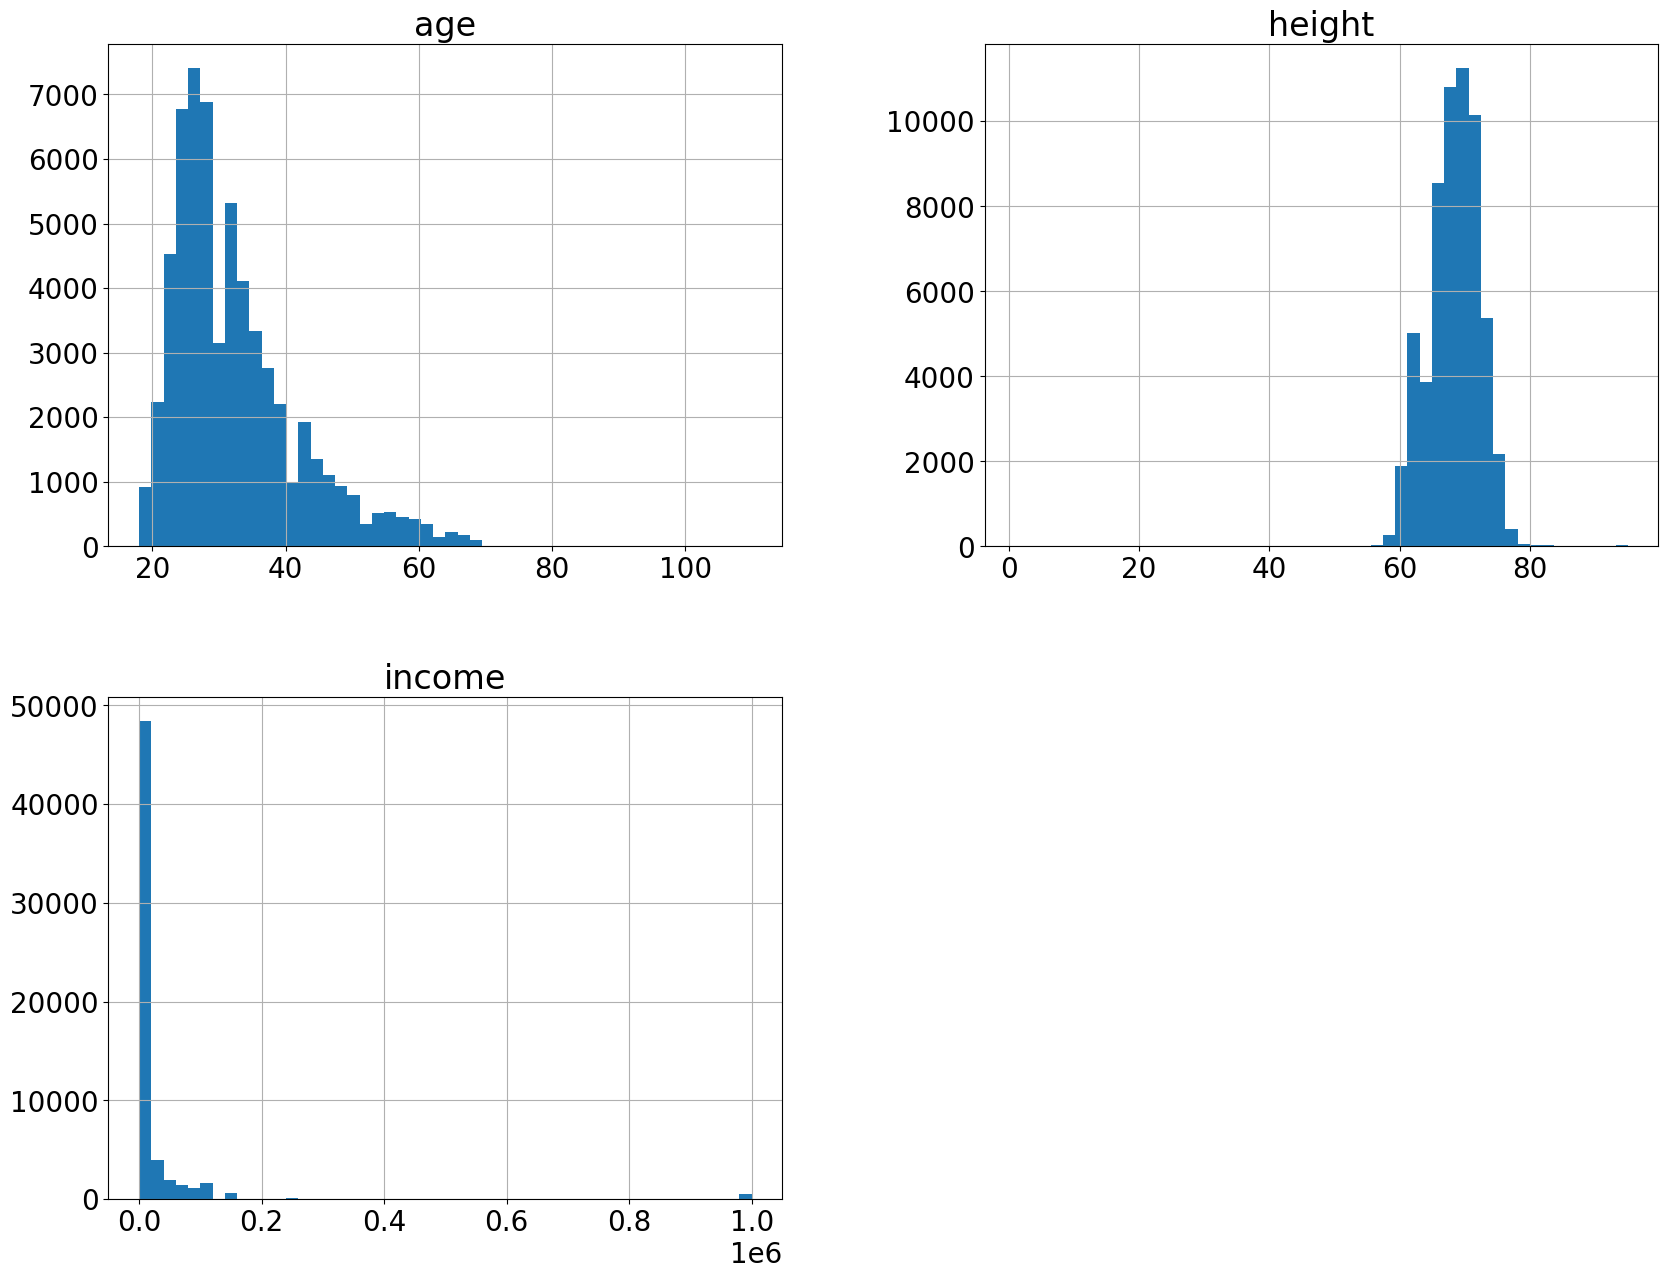

In [ ]:
#Histogramy zbioru przed modyfikacjami
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
okcupid_original.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Statystki zbioru przed modyfikacjami
#Przegląd statystyk na kolumnach numerycznych
okcupid_original.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [ ]:
#Przegląd statystyk na kolumnach nienumerycznych
import numpy as np

okcupid_original.describe(exclude=np.number)

,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,job,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
count,59946,59946,59946,54650,35551,56961,45866,53318,54266,51748,...,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343
unique,5,2,3,12,18,6,3,32,217,21,...,54347,51516,48625,43520,49257,48961,43583,45548,39323,45440
top,single,m,straight,average,mostly anything,socially,never,graduated from college/university,white,other,...,.,enjoying it.,listening,my smile,ask me,family,my future,out with friends,ask me,you want to.
freq,55697,35829,51606,14652,16585,41780,37724,23959,32831,7589,...,12,61,82,529,16,6,161,89,45,200


In [ ]:
#Ogólny przegląd zbioru

In [ ]:
#Pomocnicze rozszerzenie wyświetlanej ilości kolumn
pd.set_option('display.max_columns', 31)

In [ ]:
okcupid_original.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [ ]:
#Definiowanie customowej funkcji do wyświetlania informacji o zbiorze danych
import pandas as pd

def print_dataframe_info(dataframe):
    info_df = pd.DataFrame({
        "Column Name": dataframe.columns,
        "Non-Null Count": dataframe.count(),
        "Dtype": dataframe.dtypes,
        "Unique Values": [dataframe[col].nunique() for col in dataframe.columns]
    })

    info_df = print(info_df.reset_index(drop=True))

    num_rows = len(dataframe)
    num_columns = len(dataframe.columns)

    rows_info = print("Number of rows: ", num_rows)
    columns_info = print("Number of columns: ", num_columns)

    return info_df, rows_info, columns_info

In [ ]:
info_df = print_dataframe_info(okcupid_original)

    Column Name  Non-Null Count    Dtype  Unique Values
0           age           59946    int64             54
1        status           59946   object              5
2           sex           59946   object              2
3   orientation           59946   object              3
4     body_type           54650   object             12
5          diet           35551   object             18
6        drinks           56961   object              6
7         drugs           45866   object              3
8     education           53318   object             32
9     ethnicity           54266   object            217
10       height           59943  float64             60
11       income           59946    int64             13
12          job           51748   object             21
13  last_online           59946   object          30123
14     location           59946   object            199
15    offspring           24385   object             15
16         pets           40025   object        

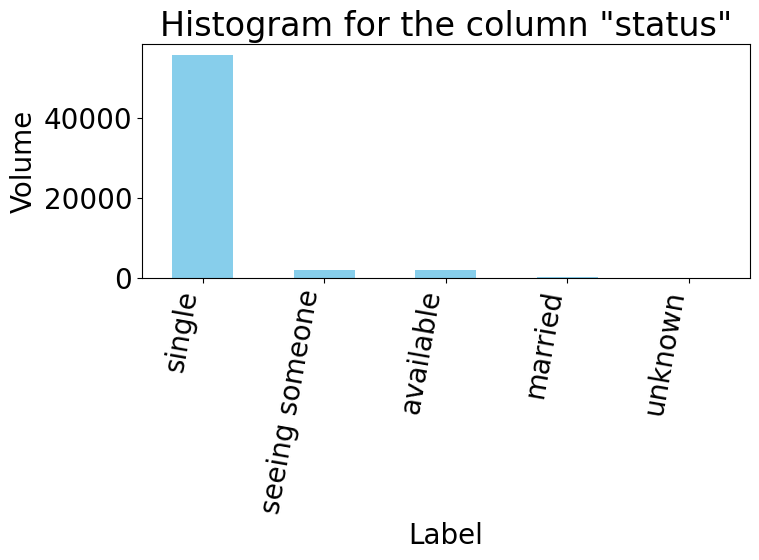

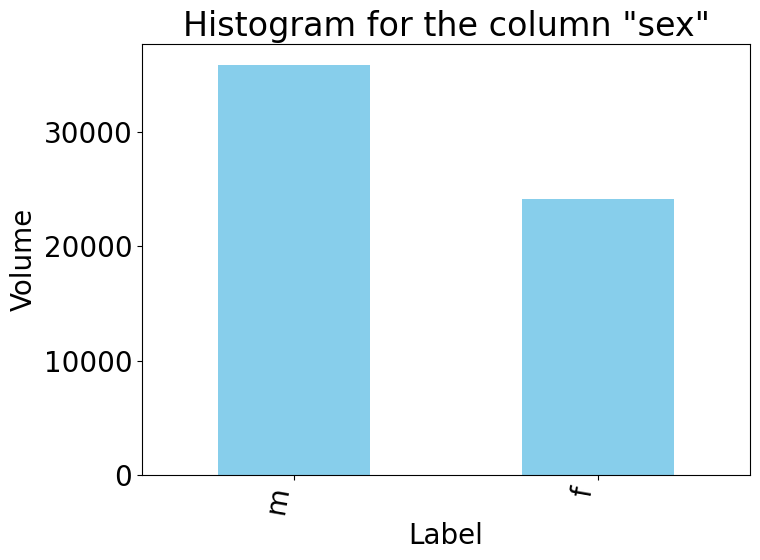

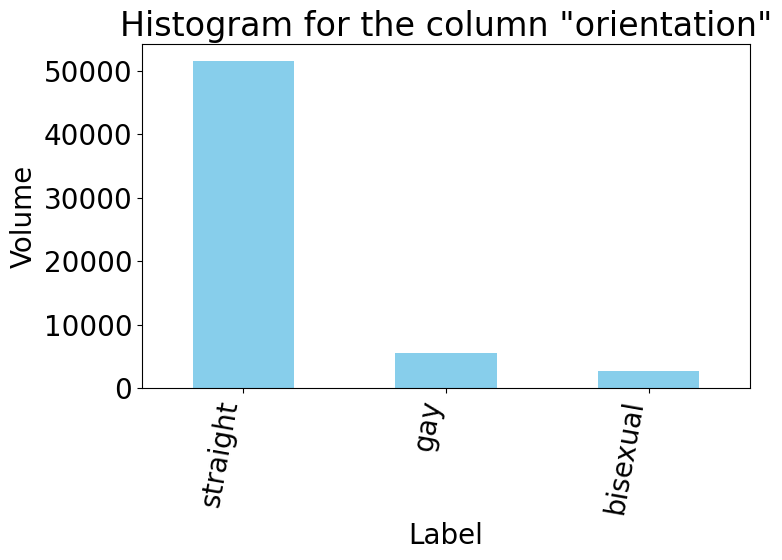

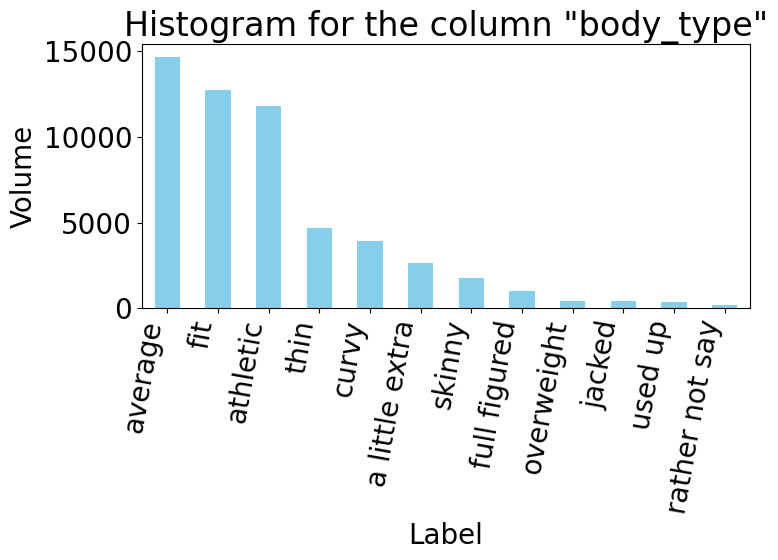

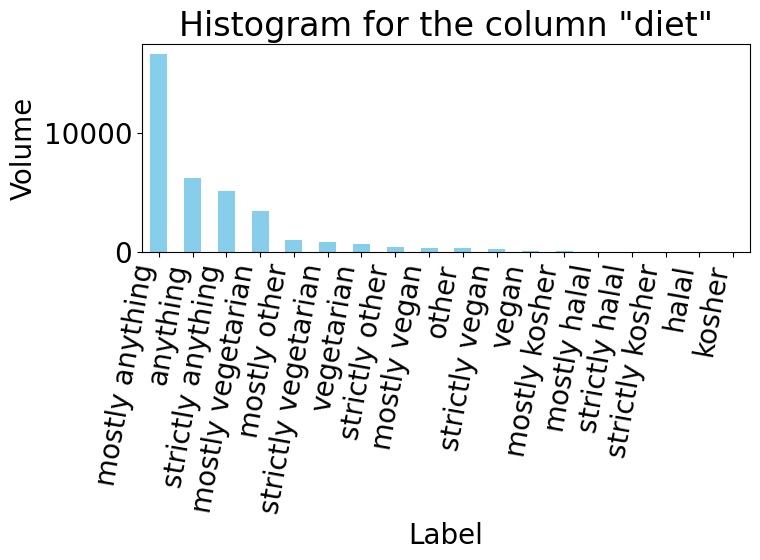

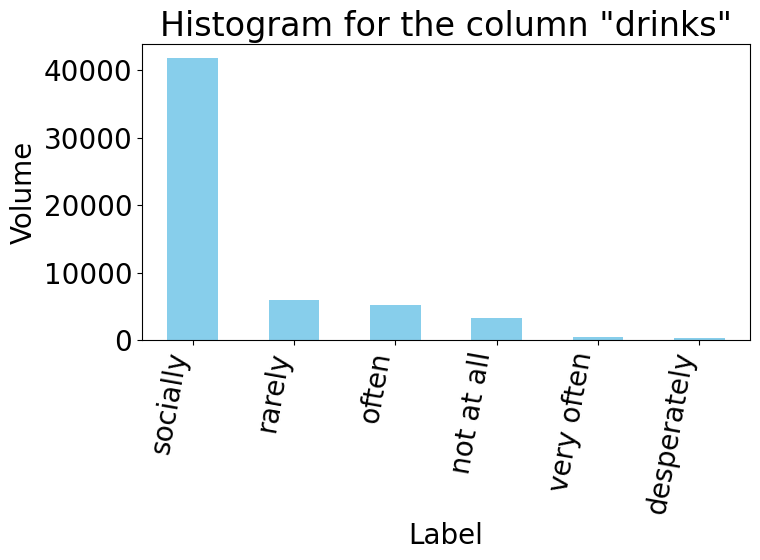

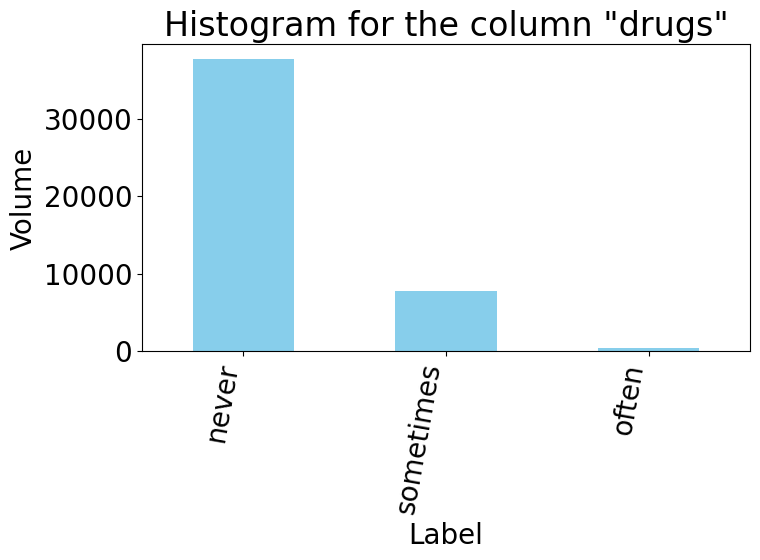

<ipython-input-17-a9b3d36ee08d>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


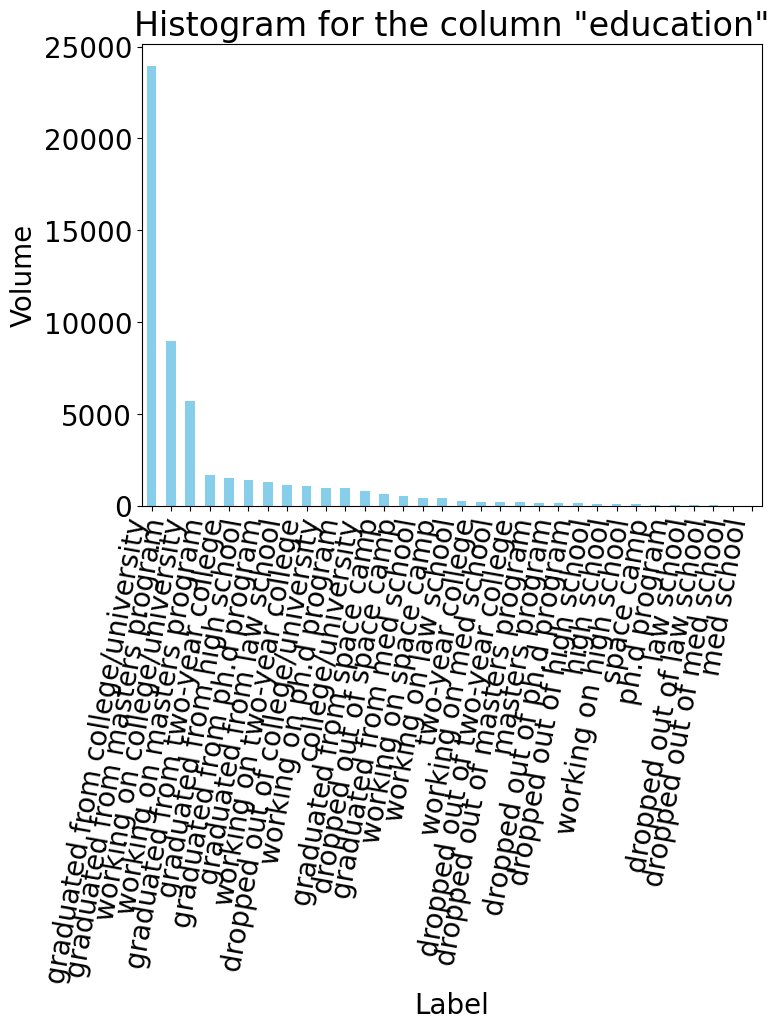

<ipython-input-17-a9b3d36ee08d>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


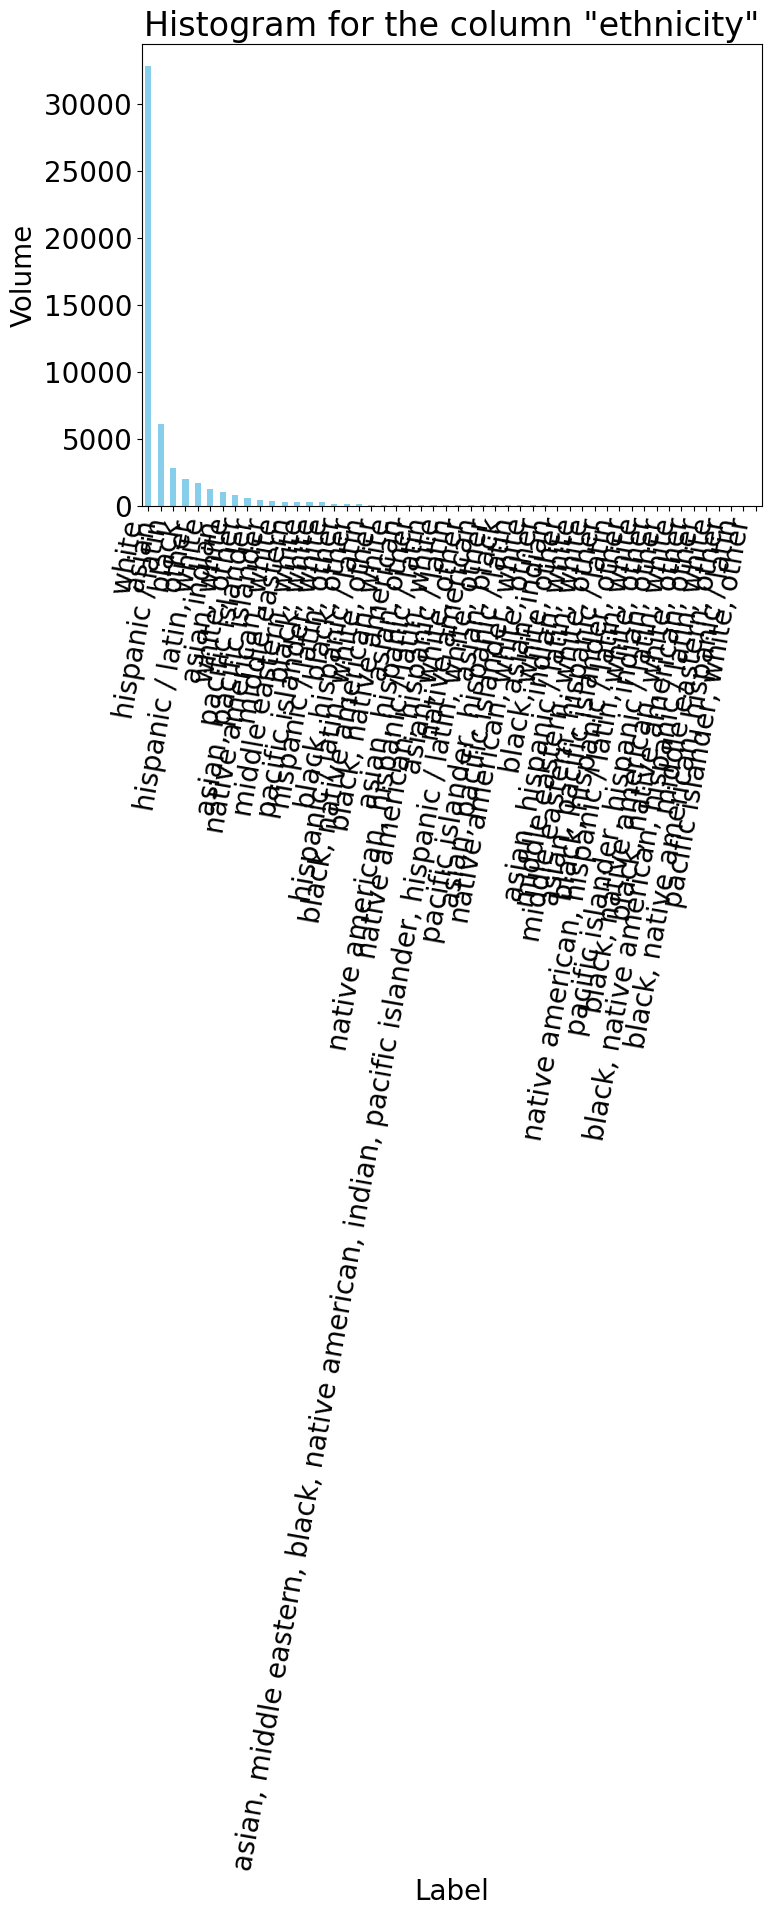

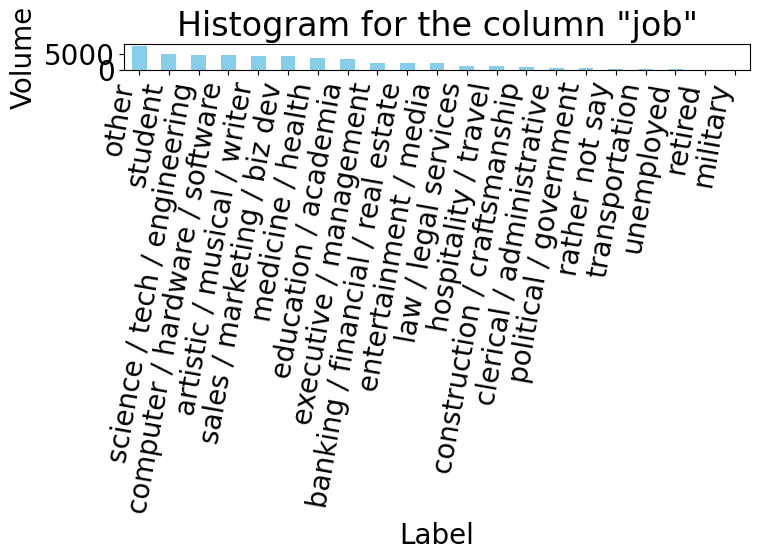

In [ ]:
#Histogramy dla danych nienumerycznych
import matplotlib.pyplot as plt

#Wybierz kolumny typu 'object', które zawierają "essay" w nazwie
essay_columns = [col for col in okcupid_original.columns if 'essay' in col]

#Wybierz tylko kolumny, które nie zawierają "essay" w nazwie oraz pomijamy kolumnę '[last_online]'
object_columns = okcupid_original.select_dtypes(include=['object']).drop(columns=essay_columns + ['last_online'], errors='ignore')

#Tworzymy histogramy dla każdej z wybranych kolumn
#W przypadku, jeżeli mamy więcej niż 50 etykiet w danej kolumnie - pozostawiamy na wykresie tylko 50 najpopularniejszych
for column in object_columns.columns:
    plt.figure(figsize=(8, 6))
    if len(object_columns[column].unique()) <= 50:
        value_counts = object_columns[column].value_counts()
    else:
        value_counts = object_columns[column].value_counts()[:50]

    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Histogram for the column "{column}"')
    plt.xlabel('Label')
    plt.ylabel('Volume')
    plt.xticks(rotation=80, ha='right')  # Obrót etykiet osi X
    plt.tight_layout()  # Dostosowanie układu
    plt.show()

In [ ]:
#4.2 Przegląd poszczególnych kolumn

In [ ]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy
#Zostawienie ich tylko jako podgląd wartości, nie wyświetlanie wszystkich

pd.set_option('display.max_rows', 4)

In [ ]:
#[age]
print(okcupid_original["age"].value_counts())
print("Dtype:", okcupid_original["age"].dtype)
print("Unique Values:", okcupid_original["age"].nunique())
print("Range:", okcupid_original["age"].min(), "-", okcupid_original["age"].max())

In [ ]:
#[status]
print(okcupid_original["status"].value_counts())
print("Dtype:", okcupid_original["status"].dtype)
print("Unique Values:", okcupid_original["status"].nunique())

In [ ]:
#[sex]
print(okcupid_original["sex"].value_counts())
print("Dtype:", okcupid_original["sex"].dtype)
print("Unique Values:", okcupid_original["sex"].nunique())

In [ ]:
#[orientation]
print(okcupid_original["orientation"].value_counts())
print("Dtype:", okcupid_original["orientation"].dtype)
print("Unique Values:", okcupid_original["orientation"].nunique())

In [ ]:
#[body_type]
print(okcupid_original["body_type"].value_counts())
print("Dtype:", okcupid_original["body_type"].dtype)
print("Unique Values:", okcupid_original["body_type"].nunique())

In [ ]:
#[diet]
print(okcupid_original["diet"].value_counts())
print("Dtype:", okcupid_original["diet"].dtype)
print("Unique Values:", okcupid_original["diet"].nunique())

In [ ]:
#[drinks]
print(okcupid_original["drinks"].value_counts())
print("Dtype:", okcupid_original["drinks"].dtype)
print("Unique Values:", okcupid_original["drinks"].nunique())

In [ ]:
#[drugs]
print(okcupid_original["drugs"].value_counts())
print("Dtype:", okcupid_original["drugs"].dtype)
print("Unique Values:", okcupid_original["drugs"].nunique())

In [ ]:
#[education]
print(okcupid_original["education"].value_counts())
print("Dtype:", okcupid_original["education"].dtype)
print("Unique Values:", okcupid_original["education"].nunique())

In [ ]:
#[ethnicity]
print(okcupid_original["ethnicity"].value_counts())
print("Dtype:", okcupid_original["ethnicity"].dtype)
print("Unique Values:", okcupid_original["ethnicity"].nunique())

In [ ]:
#[height]
print(okcupid_original["height"].value_counts())
print("Dtype:", okcupid_original["height"].dtype)
print("Unique Values:", okcupid_original["height"].nunique())
print("Range:", okcupid_original["height"].min(), "-", okcupid_original["height"].max())

In [ ]:
#[income]
print(okcupid_original["income"].value_counts())
print("Dtype:", okcupid_original["income"].dtype)
print("Unique Values:", okcupid_original["income"].nunique())
print("Range:", okcupid_original["income"].min(), "-", okcupid_original["income"].max())

In [ ]:
#[job]
print(okcupid_original["job"].value_counts())
print("Dtype:", okcupid_original["job"].dtype)
print("Unique Values:", okcupid_original["job"].nunique())

In [ ]:
#[last_online]
print(okcupid_original["last_online"].value_counts())
print("Dtype:", okcupid_original["last_online"].dtype)
print("Unique Values:", okcupid_original["last_online"].nunique())
print("Range:", okcupid_original["last_online"].min(), "-", okcupid_original["last_online"].max())

In [ ]:
#[location]
print(okcupid_original["location"].value_counts())
print("Dtype:", okcupid_original["location"].dtype)
print("Unique Values:", okcupid_original["location"].nunique())

In [ ]:
#[offspring]
print(okcupid_original["offspring"].value_counts())
print("Dtype:", okcupid_original["offspring"].dtype)
print("Unique Values:", okcupid_original["offspring"].nunique())

In [ ]:
#[pets]
print(okcupid_original["pets"].value_counts())
print("Dtype:", okcupid_original["pets"].dtype)
print("Unique Values:", okcupid_original["pets"].nunique())

In [ ]:
#[religion]
print(okcupid_original["religion"].value_counts())
print("Dtype:", okcupid_original["religion"].dtype)
print("Unique Values:", okcupid_original["religion"].nunique())

In [ ]:
#[sign]
print(okcupid_original["sign"].value_counts())
print("Dtype:", okcupid_original["sign"].dtype)
print("Unique Values:", okcupid_original["sign"].nunique())

In [ ]:
#[smokes]
print(okcupid_original["smokes"].value_counts())
print("Dtype:", okcupid_original["smokes"].dtype)
print("Unique Values:", okcupid_original["smokes"].nunique())

In [ ]:
#[speaks]
print(okcupid_original["speaks"].value_counts())
print("Dtype:", okcupid_original["speaks"].dtype)
print("Unique Values:", okcupid_original["speaks"].nunique())

In [ ]:
#[essay0]
#print(okcupid_original["essay0"].value_counts())
print("Dtype:", okcupid_original["essay0"].dtype)
print("Unique Values:", okcupid_original["essay0"].nunique())

In [ ]:
#[essay1]
#print(okcupid_original["essay1"].value_counts())
print("Dtype:", okcupid_original["essay1"].dtype)
print("Unique Values:", okcupid_original["essay1"].nunique())

In [ ]:
#[essay2]
#print(okcupid_original["essay2"].value_counts())
print("Dtype:", okcupid_original["essay2"].dtype)
print("Unique Values:", okcupid_original["essay2"].nunique())

In [ ]:
#[essay3]
#print(okcupid_original["essay3"].value_counts())
print("Dtype:", okcupid_original["essay3"].dtype)
print("Unique Values:", okcupid_original["essay3"].nunique())

In [ ]:
#[essay4]
#print(okcupid_original["essay4"].value_counts())
print("Dtype:", okcupid_original["essay4"].dtype)
print("Unique Values:", okcupid_original["essay4"].nunique())

In [ ]:
#[essay5]
#print(okcupid_original["essay5"].value_counts())
print("Dtype:", okcupid_original["essay5"].dtype)
print("Unique Values:", okcupid_original["essay5"].nunique())

In [ ]:
#[essay6]
#print(okcupid_original["essay6"].value_counts())
print("Dtype:", okcupid_original["essay6"].dtype)
print("Unique Values:", okcupid_original["essay6"].nunique())

In [ ]:
#[essay7]
#print(okcupid_original["essay7"].value_counts())
print("Dtype:", okcupid_original["essay7"].dtype)
print("Unique Values:", okcupid_original["essay7"].nunique())

In [ ]:
#[essay8]
#print(okcupid_original["essay8"].value_counts())
print("Dtype:", okcupid_original["essay8"].dtype)
print("Unique Values:", okcupid_original["essay8"].nunique())

In [ ]:
#[essay9]
#print(okcupid_original["essay9"].value_counts())
print("Dtype:", okcupid_original["essay9"].dtype)
print("Unique Values:", okcupid_original["essay9"].nunique())

In [ ]:
#Kopiowanie zbioru danych przed rozpoczęciem operacji na nich
okcupid = okcupid_original.copy()

In [ ]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy
#Przywrócenie do pierwotnego stanu

pd.set_option('display.max_rows', None)

In [ ]:
#4.3 Usunięcia kolumn

In [ ]:
#Lista kolumn do usunięcia
columns_to_drop = ['ethnicity', 'height', 'income', 'last_online', 'location', 'sign', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

In [ ]:
#Usunięcie kolumn
okcupid.drop(columns=columns_to_drop, inplace=True)

In [ ]:
info_df = print_dataframe_info(okcupid)

In [ ]:
#4.4 Usunięcia wierszy z niepożądanymi wartościami

In [ ]:
#Słownik z wierszami do usunięcia, gdzie kluczami są nazwy kolumn, a wartości to listy wartości do usunięcia
rows_to_drop = {'status': ['married', 'unknown'], 'orientation': ['bisexual', 'gay']}

In [ ]:
#Usunięcie wierszy (nadpisanie zbioru)
for column, values in rows_to_drop.items():
    okcupid = okcupid[~okcupid[column].isin(values)]

In [ ]:
#Sprawdzenie poprawności wykonania operacji - status
print(okcupid["status"].value_counts())
print("Dtype:", okcupid["status"].dtype)
print("Unique Values:", okcupid["status"].nunique())

In [ ]:
#Sprawdzenie poprawności wykonania operacji - orientation
print(okcupid["orientation"].value_counts())
print("Dtype:", okcupid["orientation"].dtype)
print("Unique Values:", okcupid["orientation"].nunique())

In [ ]:
#4.5 Wartości odstające

In [ ]:
#Lista kolumn do badania wartości odstających
columns_check_outliers = ['age']

In [ ]:
import matplotlib.pyplot as plt

def plot_outliers(dataframe, columns):
    for column in columns:
        plt.figure(figsize=(8, 6))
        plt.plot(dataframe[column], marker='o', linestyle='None', color='blue', markersize=3)
        plt.title(f'Value of column"{column}"')
        plt.xlabel('Index')
        plt.ylabel(f'Value {column}')
        plt.grid(True)
        plt.show()

In [ ]:
plot_outliers(okcupid, columns_check_outliers)

In [ ]:
# Wyświetlenie wierszy, w których wartość kolumny "age" przekracza 100
print(okcupid[okcupid['age'] > 100])

In [ ]:
#Usunięcie wierszy (nadpisanie zbioru), w których wartość kolumny "age" przekracza 100
okcupid = okcupid[okcupid['age'] <= 100]

In [ ]:
plot_outliers(okcupid, columns_check_outliers)

In [ ]:
#4.6 Wartości NaN

In [ ]:
#Definiowanie customowej funkcji do wyświetlania informacji o wartościach NaN

def print_nan_count_info(dataframe):
    nan_count_series = dataframe.isna().sum()
    info_df = pd.DataFrame({
        "Column Name": nan_count_series.index,
        "Dtype": dataframe.dtypes,
        "NaN Count": nan_count_series.values
    })

    info_df = print(info_df.reset_index(drop=True))

    nan_count = dataframe.isna().sum().sum()

    nan_info = print("Number of NaN values in the dataset:", nan_count)

    return info_df, nan_info

In [ ]:
#Sprawdzanie ilości NaN w poszczególnych kolumnach oraz całościowo zbiorze
info_nan_df = print_nan_count_info(okcupid)

In [ ]:
#Lista kolumn do uzupełnienia wartości NaN
columns_to_replace_nan = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'offspring', 'pets', 'religion', 'smokes']

In [ ]:
#Definiowanie customowej funkcji do uzupełniania wartości NaN za pomocą strategii most_frequent

from sklearn.impute import SimpleImputer

def replace_nan_with_most_frequent(dataframe, columns):
    #Inicjalizacja klasy SimpleImputer
    imputer = SimpleImputer(strategy='most_frequent')
    #Dopasowanie imputera do danych i ich transformacja
    imputed_data = imputer.fit_transform(dataframe[columns])
    dataframe[columns] = imputed_data

    for column in columns:
        most_frequent_value = imputer.statistics_[columns.index(column)]
        print(f"The most frequent value in the column '{column}': {most_frequent_value}")

    return dataframe

In [ ]:
#Uzupełnienie kolumn z wartościami NaN
okcupid = replace_nan_with_most_frequent(okcupid, columns_to_replace_nan)

In [ ]:
#Sprawdzanie ilości NaN w poszczególnych kolumnach oraz całościowo zbiorze po przekształceniach
info_nan_df = print("Number of NaN values in the dataset:", okcupid.isna().sum().sum())

In [ ]:
#Checkpoint - kopiowanie danych przed rozpoczęciem operacji kodowań
okcupid1 = okcupid.copy()

In [ ]:
#4.7 One-hot encoding

In [ ]:
#Lista kolumn do One-hot encoding
columns_to_one_hot = ['sex', 'orientation']

In [ ]:
#Uzupełnienie kolumn za pomocą One-hot encoding
for column in columns_to_one_hot:
    okcupid1 = pd.get_dummies(okcupid1, columns=[column])

In [ ]:
#Sprawdzenie zmian na zbiorze
print(okcupid1.head())

In [ ]:
#4.8 One-hot encoding po rozdzieleniu treści

In [ ]:
#Ze względu na złożoność przypadków każdy z nich zostanie rozpatrzony indywidualnie.

In [ ]:
#[diet]
#Dokładne sprawdzenie wartości
print(okcupid_original["diet"].value_counts())

In [ ]:
import numpy as np

#Typy diet dostępne w zbiorze
diet_types = ['anything', 'vegetarian', 'vegan', 'kosher', 'halal', 'other']

#Przetwarzanie diety na 2 odrębne cechy
def process_diet(diet):
    is_serious_about_diet = True if 'strictly' in diet else False #Sprawdzenie występowania "strictly" w diecie
    diet_type = None
    for word in diet.split():
        if word in diet_types:
            diet_type = word
            break

    return is_serious_about_diet, diet_type

In [ ]:
#Zastosowanie funkcji
okcupid1['is_serious_about_diet'], okcupid1['diet_type'] = zip(*okcupid1['diet'].apply(process_diet))

In [ ]:
print("After splitting the [diet] column")
print(okcupid1.head())

In [ ]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['diet_type'])

In [ ]:
print("After One-hot encoding the [diet] column")
print(okcupid1.head())

In [ ]:
#[religion]
#Dokładne sprawdzenie wartości
print(okcupid_original["religion"].value_counts())

In [ ]:
#Typy religii dostępne w zbiorze
religion_types = ['agnosticism', 'other', 'agnosticism', 'catholicism', 'atheism', 'christianity', 'judaism', 'buddhism', 'hinduism', 'islam']

#Przetwarzanie religii na 2 odrębne cechy
def process_religion(religion):
    is_serious_about_religion = True if 'somewhat serious about it' in religion or 'very serious about it' in religion else False
    religion_type = None
    for word in religion.split():
        if word in religion_types:
            religion_type = word
            break

    return is_serious_about_religion, religion_type

In [ ]:
#Zastosowanie funkcji
okcupid1['is_serious_about_religion'], okcupid1['religion_type'] = zip(*okcupid1['religion'].apply(process_religion))

In [ ]:
print("After splitting the [religion] column")
print(okcupid1.head())

In [ ]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['religion_type'])

In [ ]:
print("After One-hot encoding the [religion] column")
print(okcupid1.head())

In [ ]:
#[offspring]
#Dokładne sprawdzenie wartości
print(okcupid_original["offspring"].value_counts())

In [ ]:
#Przetwarzanie potomstwa na 2 odrębne cechy
def process_offspring(offspring):
    want_kids = False if "doesn't want" in offspring else True  #Sprawdzenie występowania 3 kombinacji "doesn't want": kids, more, any
    has_kids = True if 'has kids' in offspring or 'has a kid' in offspring else False  #Sprawdzenie występowania 'has kids' lub 'has a kid'

    return has_kids, want_kids

In [ ]:
#Zastosowanie funkcji
okcupid1['want_kids'], okcupid1['has_kids'] = zip(*okcupid1['offspring'].apply(process_offspring))

In [ ]:
print("After splitting the [offspring] column")
print(okcupid1.head())

In [ ]:
#[pets]
#Dokładne sprawdzenie wartości
print(okcupid1["pets"].value_counts())

In [ ]:
#Przetwarzanie zwierząt na 4 odrębne cechy
def process_pets(pets):
    has_dogs = True if 'has dogs' in pets else False
    has_cats = True if 'has cats' in pets else False
    likes_dogs = False if "dislikes dogs" in pets else True
    likes_cats = False if "dislikes cats" in pets else True

    return likes_dogs, likes_cats, has_dogs, has_cats

In [ ]:
#Zastosowanie fukncji
okcupid1['likes_dogs'], okcupid1['likes_cats'], okcupid1['has_dogs'], okcupid1['has_cats'] = zip(*okcupid1['pets'].apply(process_pets))

In [ ]:
print("After splitting the [pets] column")
print(okcupid1.head())

In [ ]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji kodowań
okcupid2 = okcupid1.copy()

In [ ]:
#4.9 Label encoding - z wykorzystaniem Bucketingu

In [ ]:
#Ze względu na złożoność przypadków każdy z nich zostanie rozpatrzony indywidualnie.

In [ ]:
#[body_type]
#Dokładne sprawdzenie wartości
print(okcupid2["body_type"].value_counts())

In [ ]:
#Podział sylwetek na 4 "kubki", do których będą trafiać określone typy
class BodyTypeEncoder:
    def __init__(self):
        self.categories = {
            "athletic": ["athletic", "fit", "average"],
            "slim": ["thin", "skinny"],
            "curvy": ["a little extra", "curvy", "full figured"],
            "overweight": ["overweight", "jacked", "used up", "rather not say"]
        }
        self.category_mapping = {
            "athletic": 0,
            "slim": 1,
            "curvy": 2,
            "overweight": 3
        }

    def encode(self, body_type):
        for category, subcategories in self.categories.items():
            if body_type.lower() in subcategories:
                return self.category_mapping[category]
        return None

In [ ]:
encoder = BodyTypeEncoder()
okcupid2['encoded_body_type'] = okcupid2['body_type'].apply(encoder.encode)

In [ ]:
print("After encoding the [body_typ] column")
print(okcupid2.head())

In [ ]:
#[drinks]
#Dokładne sprawdzenie wartości
print(okcupid2["drinks"].value_counts())

In [ ]:
#Podział spożywania alkoholu na 3 "kubki", do których będą trafiać określone typy
class DrinksEncoder:
    def __init__(self):
        self.categories = {
            "not at all": ["not at all"],
            "sometimes": ["socially", "rarely"],
            "often": ["often", "very often", "desperately"]
        }
        self.category_mapping = {
            "not at all": 0,
            "sometimes": 1,
            "often": 2
        }

    def encode(self, drinks):
        for category, subcategories in self.categories.items():
            if drinks.lower() in subcategories:
                return self.category_mapping[category]
        return None

In [ ]:
encoder = DrinksEncoder()
okcupid2['encoded_drinks'] = okcupid2['drinks'].apply(encoder.encode)

In [ ]:
print("After encoding the [drinks] column")
print(okcupid2.head())

In [ ]:
#[drugs]
#Dokładne sprawdzenie wartości
print(okcupid2["drugs"].value_counts())

In [ ]:
#Podział zażywania narkotyków na 3 "kubki", do których będą trafiać określone typy
class DrugsEncoder:
    def __init__(self):
        self.categories = {
            "never": ["never"],
            "sometimes": ["sometimes"],
            "often": ["often"]
        }
        self.category_mapping = {
            "never": 0,
            "sometimes": 1,
            "often": 2
        }

    def encode(self, drugs):
        for category, subcategories in self.categories.items():
            if drugs.lower() in subcategories:
                return self.category_mapping[category]
        return None

In [ ]:
encoder = DrugsEncoder()
okcupid2['encoded_drugs'] = okcupid2['drugs'].apply(encoder.encode)

In [ ]:
print("After encoding the [drugs] column")
print(okcupid2.head())

In [ ]:
#[smokes]
#Dokładne sprawdzenie wartości
print(okcupid2["smokes"].value_counts())

In [ ]:
#Podział palenia papierosów na 3 "kubki", do których będą trafiać określone typy
class SmokesEncoder:
    def __init__(self):
        self.categories = {
            "no": ["no"],
            "sometimes": ["sometimes", "when drinking", "trying to quit"],
            "yes": ["yes"]
        }
        self.category_mapping = {
            "no": 0,
            "sometimes": 1,
            "yes": 2
        }

    def encode(self, smokes):
        for category, subcategories in self.categories.items():
            if smokes.lower() in subcategories:
                return self.category_mapping[category]
        return None

In [ ]:
encoder = SmokesEncoder()
okcupid2['encoded_smokes'] = okcupid2['smokes'].apply(encoder.encode)

In [ ]:
print("After encoding the [smokes] column")
print(okcupid2.head())

In [ ]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji kodowań
okcupid3 = okcupid2.copy()

In [ ]:
#4.10 Label encoding

In [ ]:
#Kontrolne wyświetlenie pozostałych kolumn
info_df = print_dataframe_info(okcupid3)

In [ ]:
#Kodowane będą następujące kolumny:
columns_to_label_encoding = ['status', 'education', 'job']

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, columns):
    for column in columns:
        encoder = LabelEncoder()
        df['encoded_' + column] = encoder.fit_transform(df[column])
    return df

In [ ]:
okcupid3 = label_encode_columns(okcupid3, columns_to_label_encoding)

In [ ]:
print(okcupid3.head())

In [ ]:
#Usuwanie kolumn

In [ ]:
#Na zakończenie sprawdzamy, które kolumny się powtarzają
info_df = print_dataframe_info(okcupid3)

In [ ]:
#Usuwanie nadmiarowych kolumn
columns_to_drop = ['status', 'education', 'job', 'body_type', 'diet', 'drinks', 'drugs', 'offspring', 'pets', 'religion', 'smokes']

In [ ]:
okcupid3.drop(columns=columns_to_drop, inplace=True)

In [ ]:
#Zbiór po oczyszceniu z nadmiarowych kolumn
info_df = print_dataframe_info(okcupid3)

In [ ]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji
okcupid4 = okcupid3.copy()

In [ ]:
#4.11 Statystyki opisowe

In [ ]:
#Przedląd statystyk na kolumnch numerycznych
okcupid4.describe()

In [ ]:
#Wydruk kodu odpowiedni do wstawienia do pracy inżynierskiej
#Ze względu na objętość nie zdecydowano się na ten krok
'''
import numpy as np
import textwrap

# Przedział statystyk na kolumnach numerycznych
for i in range(0, len(okcupid4.select_dtypes(include=np.number).columns), 3):
    subset = okcupid4.select_dtypes(include=np.number).iloc[:, i:i+3]


    # Drukowanie statystyk
    print(subset.describe().to_string() + "\n" + "-"*90 + "\n")  # Nowa linia po każdym zestawie statystyk
'''

In [ ]:
#Przedląd statystyk na kolumnch nienumerycznych
okcupid4.describe(exclude=np.number)

In [ ]:
#4.12 Histogramy

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

# Określenie liczby kolumn i wierszy dla histogramów
n_rows = (len(okcupid4.columns) + 3) // 4  # Zaokrąglenie w górę
n_cols = 4

# Wyświetlanie histogramów
okcupid4.hist(bins=50, figsize=(20, 5 * n_rows), layout=(n_rows, n_cols))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Kolumny typu bool
object_columns = okcupid4.select_dtypes(include=['bool'])

plt.rcParams.update({'font.size': 13})

# Określenie liczby wierszy i kolumn dla wykresów
n_rows = len(object_columns.columns) // 2 + (len(object_columns.columns) % 2 > 0)  # Zaokrąglenie w górę

# Tworzymy histogramy dla każdej z wybranych kolumn
fig, axs = plt.subplots(n_rows, 2, figsize=(10, 4 * n_rows))  # Tworzenie figury i osi wykresów
axs = axs.flatten()  # Spłaszczanie osi wykresów do jednego wymiaru

for i, column in enumerate(object_columns.columns):
    if len(object_columns[column].unique()) <= 50:
        value_counts = object_columns[column].value_counts()
    else:
        value_counts = object_columns[column].value_counts()[:50]

    ax = axs[i]  # Wybieranie odpowiedniej osi wykresu
    value_counts.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram for "{column}"')
    ax.set_xlabel('Label')
    ax.set_ylabel('Volume')
    ax.set_ylim(0, 50000)  # Ograniczenie osi Y do 50000
    ax.tick_params(axis='x', rotation=45)  # Obrót etykiet osi X
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)  # Ustawienie rozmiaru etykiet osi X

# Usuwanie nieużywanych osi wykresów
for j in range(len(object_columns.columns), n_rows * 2):
    axs[j].remove()

plt.tight_layout()  # Dostosowanie układu
plt.show()


In [ ]:
#4.13 Macierze korelacji

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wybrane kolumny
selected_columns = ["encoded_body_type", "age", "encoded_drinks", "encoded_drugs","encoded_smokes", "is_serious_about_diet", "is_serious_about_religion",
                    "has_kids", "want_kids", "has_dogs", "has_cats", "likes_dogs", "likes_cats"]

# Macierz korelacji dla kolumn numerycznych
correlation_matrix = okcupid4[selected_columns].corr()

# Wyświetlenie macierzy korelacji jako wykres cieplny
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

In [ ]:
#Rozbudowana wersja macierzy korelacji
#DO SPRAWDZENIA, COŚ NIE DZIAŁA W GOOGLE COLLAB W PORÓWNAIU DO WŁASNEGO NOTATNIKA JUPITER
'''
import seaborn as sns
import matplotlib.pyplot as plt

#Wybierz kolumny numeryczne i logiczne, pomijając kolumnę 'straight'
selected_columns2 = okcupid4.select_dtypes(include=['int64', 'int32', 'bool'])
#.drop(columns=["orientation_straight"]).columns
#selected_columns = okcupid4.select_dtypes(include=['int64', 'int32', 'bool']).drop(columns=["orientation_straight"])


# Macierz korelacji dla kolumn numerycznych
correlation_matrix = okcupid4[selected_columns2].corr()

# Wyświetlenie macierzy korelacji jako wykres cieplny
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize":5})
plt.title('Correlation matrix')
plt.show()
'''

In [ ]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji
okcupid5 = okcupid4.copy()

In [ ]:
#5. Budowa modeli

In [ ]:
#Kod budowany wg. schematu w książce "Python i praca z danymi, rodział 11"

In [ ]:
#Przeprowadzenie PCA
import numpy as np
from scipy import linalg as la

data = np.array(okcupid5)

In [ ]:
# Sprawdzenie typu danych i kształtu tablicy data
print(type(data))
print(data.shape)

# Upewnienie się, że dane są typu float
data = data.astype(float)

In [ ]:
#Sprawdzenie jak wyglądają dane po operacji astype
print(type(data))

In [ ]:
#Macierz kowariancji
#Wyśrodkowanie danych
data -= data.mean(axis=0)
cov = np.cov(data, rowvar=False)

In [ ]:
#Obliczanie wartości własnych i wektora macierzy kowariancji
evals, evecs = la.eig(cov)

In [ ]:
#Mnoży macierz pierwotnych danych przez macierz wektora własnego

#Sortuje wartości własne i wektory własne, po czym wybiera składowe
num_components=2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:, sorted_key]

In [ ]:
print("Wartości własne:", evals)

In [ ]:
print("Wektory własne:", evecs)

In [ ]:
#Mnoży pierwotne dane przez wektory własne
principal_components=np.dot(data,evecs)
print("Głowne składowe:", principal_components)

In [ ]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy

pd.set_option('display.max_rows', 10)

In [ ]:
#Analiza głównych składowych przy użyciu biblioteki scikit-learn
import pandas as pd
from sklearn.decomposition import PCA

data=np.array(okcupid5)

#Tworzy i dopasowuje model PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data = components,
                             columns = ['główna_składowa_1', 'główna_składowa_2'])
print(components_df)

In [ ]:
#Analiza skupień

In [ ]:
#5.1 Wyznaczanie liczby skupień

In [ ]:
#Metoda łokcia

In [ ]:
#Sprawdzenie czy ramka, do usunięcia potem
print(okcupid5.shape)

In [ ]:
#Metoda Łokcia
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

data = okcupid5
wcss_list = []

for i in range (1, 15):
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    #Dodanie wskaźnika WCSS (bezwładność) skupień do score_list
    wcss_list.append(kmeans_model.inertia_)

plt.rcParams.update({'font.size': 10})

#Bezwładność
plt.plot(range(1, 15), wcss_list, marker='*')

#Tytuły wykresu
plt.title('Optimum number of clusters selected using the elbow method')

#Wyznacza etykietę osi x
plt.xlabel('Number of clusters (k)')

#Wyznacza etykietę osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

In [ ]:
#Metoda Łokcia z PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = components_df  # Składowe PCA

wcss_list = []

for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data)
    # Dodanie WCSS do listy
    wcss_list.append(kmeans_model.inertia_)

# Wykres WCSS
plt.plot(range(1, 15), wcss_list, marker='*')

# Tytuł wykresu
plt.title('Optimum number of clusters selected using the elbow method (PCA)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Ustawienie zakresu osi y
plt.ylim(0, 9e6)

# Etykieta osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

# Dodanie siatki
plt.grid(True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

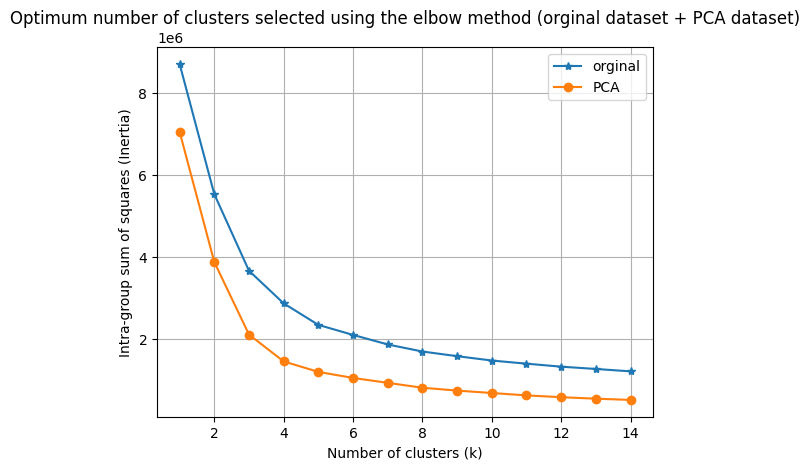

In [ ]:
#Nałożenie na siebie obu wykresów Metody Łokcia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Dane pierwotne
data_original = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data_original)

# Metoda łokcia dla danych pierwotnych
wcss_list_original = []
for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data_original)
    wcss_list_original.append(kmeans_model.inertia_)

# Metoda łokcia dla danych po PCA
wcss_list_pca = []
for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(components)
    wcss_list_pca.append(kmeans_model.inertia_)

# Wykres metody łokcia dla danych pierwotnych
plt.plot(range(1, 15), wcss_list_original, marker='*', label='orginal')

# Wykres metody łokcia dla danych po PCA
plt.plot(range(1, 15), wcss_list_pca, marker='o', label='PCA')

# Tytuł wykresu
plt.title('Optimum number of clusters selected using the elbow method (orginal dataset + PCA dataset)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Etykieta osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

# Legenda
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

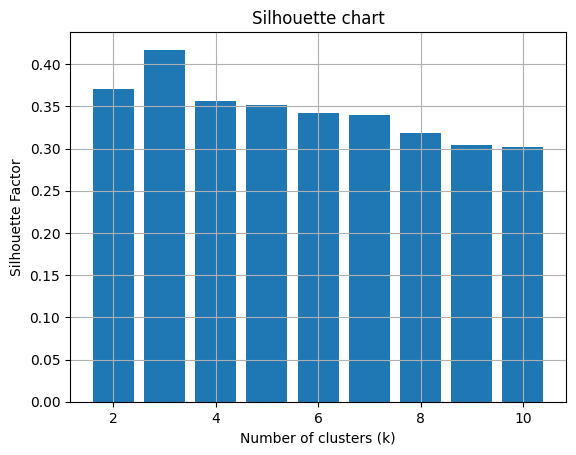

In [ ]:
#Uwaga na ten kod - długo się wykonuje
#Metoda Profilu
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

#Import wskaźnika profilu
from sklearn.metrics import silhouette_score

data = okcupid5
score_list = []

for i in range (2, 11):
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    #Uzyskuje przewidywania
    pred=kmeans_model.predict(data)
    #Obliczanie wskaźnika profilu
    score = silhouette_score(data, pred, metric='euclidean')

    #Dodaje wskaźnik profilu skupień do score_list
    score_list.append(score)

#Wykres współczynnika profilu w funkcji liczby skupień
plt.bar(range(2, 11), score_list)

#Wyznacza tytuł wykresu
plt.title('Silhouette chart')

#Wyznacza etykietę osi x
plt.xlabel('Number of clusters (k)')

#Wyznacza etykietę osi y
plt.ylabel('Silhouette Factor')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

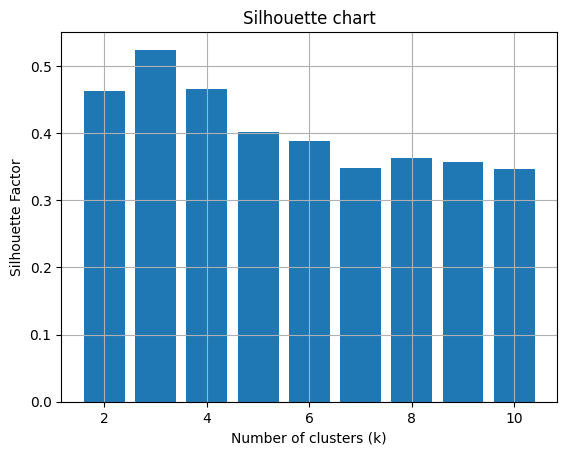

In [ ]:
#Uwaga na ten kod - długo się wykonuje
#Metoda profilu po PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Import wskaźnika profilu
from sklearn.metrics import silhouette_score

data = components_df  # Składowe PCA
score_list = []

for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data)
    # Uzyskanie przewidywań
    pred = kmeans_model.predict(data)
    # Obliczenie wskaźnika profilu
    score = silhouette_score(data, pred, metric='euclidean')

    # Dodanie wskaźnika profilu skupień do score_list
    score_list.append(score)

# Wykres współczynnika profilu w funkcji liczby skupień
plt.bar(range(2, 11), score_list)

# Wyznaczenie tytułu wykresu
plt.title('Silhouette chart')

# Wyznaczenie etykiety osi x
plt.xlabel('Number of clusters (k)')

# Wyznaczenie etykiety osi y
plt.ylabel('Silhouette Factor')

# Dodanie siatki na wykresie
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

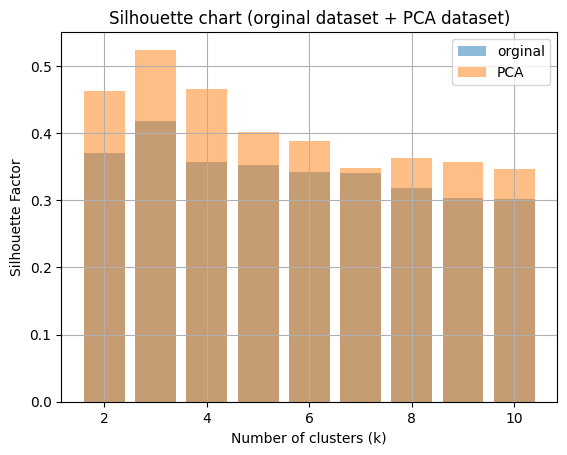

In [ ]:
#Uwaga na ten kod - długo się wykonuje
#Nałożenie na siebie obu wykresów Profilu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dane pierwotne
data_original = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data_original)

# Metoda Profilu dla danych pierwotnych
score_list_original = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data_original)
    pred = kmeans_model.predict(data_original)
    score = silhouette_score(data_original, pred, metric='euclidean')
    score_list_original.append(score)

# Metoda Profilu dla danych po PCA
score_list_pca = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(components)
    pred = kmeans_model.predict(components)
    score = silhouette_score(components, pred, metric='euclidean')
    score_list_pca.append(score)

# Wykres metody Profilu dla danych pierwotnych
plt.bar(range(2, 11), score_list_original, alpha=0.5, label='orginal')

# Wykres metody Profilu dla danych po PCA
plt.bar(range(2, 11), score_list_pca, alpha=0.5, label='PCA')

# Tytuł wykresu
plt.title('Silhouette chart (orginal dataset + PCA dataset)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Etykieta osi y
plt.ylabel('Silhouette Factor')

# Legenda
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.show()


In [ ]:
#4.3 Metoda k-średnich (k-means)/centroidów
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = okcupid5

#Definiowanie liczby skupień
num_clusters = 3

#Tworzy i dopasowuje model KMeans
km = KMeans(n_clusters=num_clusters)
km.fit(data)

#Przewiduje zmienną docelową
pred=km.predict(data)

#Tworzy wykres skupień
#plt.scatter(data.iloc[:, 0], data.iloc[:, 8], c=pred, marker="o", cmap="bwr_r")


# Przewidywanie przynależności do skupienia dla każdego punktu danych
#cluster_labels = kmeans_model.predict(data)

# Wyświetlenie wyników analizy skupień
print(pred)

#Wyznacza tytuł wykresu
#plt.title('Analiza skupień metodą centroidów')

#Wyznacza etykietę osi x
#plt.xlabel('Wartość osi x')

#Wyznacza etykietę osi y
#plt.ylabel('Wartość osi y')

#Dodanie siatki na wykresie
#plt.grid(True)

#plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 1 ... 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


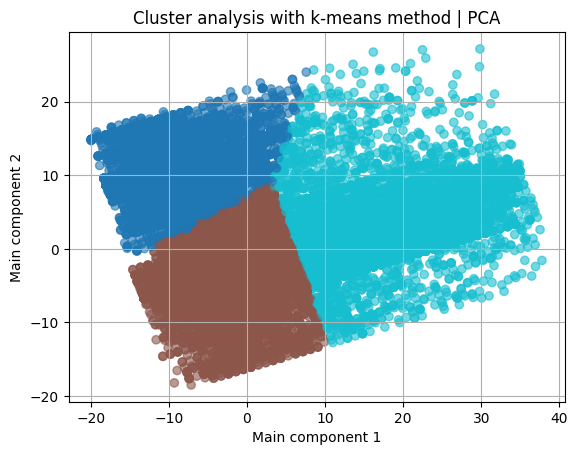

In [ ]:
#Z użyciem PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Definiowanie liczby skupień
num_clusters = 3

# Tworzy i dopasowuje model KMeans
km = KMeans(n_clusters=num_clusters) #unikanie losowości, random_state=42 - nie jest konieczne?
km.fit(components)

# Przewiduje zmienną docelową
pred_km = km.predict(components)

# Tworzy wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_km, marker="o", cmap="tab10", alpha=0.6)
plt.title('Cluster analysis with k-means method | PCA')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

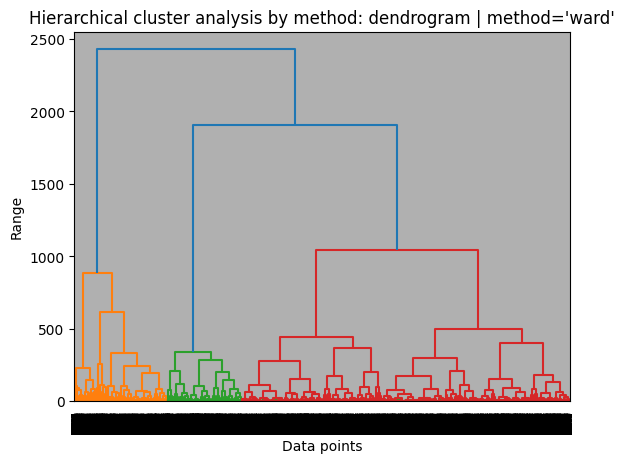

In [ ]:
#Uwaga, wykonuje się ponad 15 minut!
#5.3 Hierarchiczna analiza skupień
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

data=components_df

# Dodanie kolorów klastrów
color_threshold = 2.5  # Próg kolorowania klastrów
for i, color in zip(range(1, num_clusters + 1), plt.cm.tab10.colors):
    plt.axhline(y=color_threshold * i, color=color, linestyle='--')

#Tworzy dendrogram za pomocą wiązania Warda
dendrogram_plot = dendrogram(linkage(data, method='ward'))

#Wyznacza tytuł wykresu
plt.title("Hierarchical cluster analysis by method: dendrogram | method='ward'")

#Wyznacza etykietę osi x
plt.xlabel('Data points')

#Wyznacza etykietę osi y
plt.ylabel('Range')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

In [ ]:
#Aglomeracyjna analiza skupień
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data=okcupid5

#Wyznacza liczbę skupień
num_clusters=3

#Model aglomeracyjny analizy skupień
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

#Dopasowuje model aglomeracyjnej analizy skupień
ac.fit(data)

#Przewidywanie zmiennej docelowej
pred=ac.fit_predict(data)

print(pred)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Wczytanie danych z PCA (components_df)
data = components_df

# 1. Wyświetlenie początkowych wierszy danych
print("Initial data rows:")
print(data.head())

# 2. Sprawdzenie typów danych kolumn
print("\nColumn data types:")
print(data.dtypes)

# 3. Sprawdzenie brakujących wartości
print("\nMissing values:")
print(data.isnull().sum())

# 4. Sprawdzenie indeksów DataFrame
print("\nDataFrame indexes:")
print(data.index)

# Wyznaczenie liczby skupień
num_clusters = 3

# Wybór losowych punktów startowych
random_indices = np.random.choice(len(data), num_clusters, replace=False)
random_centers = data.values[random_indices]

# Model aglomeracyjny analizy skupień z losowym inicjowaniem
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean',
                             compute_full_tree='auto', connectivity=None, distance_threshold=None)

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Agglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()


In [ ]:
# Agglomeracyjna analiza skupień
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Wczytanie danych z PCA (components_df)
data = components_df

# Wyznaczenie liczby skupień
num_clusters = 3

# Model aglomeracyjny analizy skupień
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Agglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [ ]:
#Deglomeracyjna analiza skupień
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data = okcupid5

# Wyznaczenie liczby skupień
num_clusters = 3

# Model deglomeracyjny analizy skupień
ac_deg = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

# Dopasowanie modelu deglomeracyjnej analizy skupień
ac_deg.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac_deg.fit_predict(data)

print(pred)

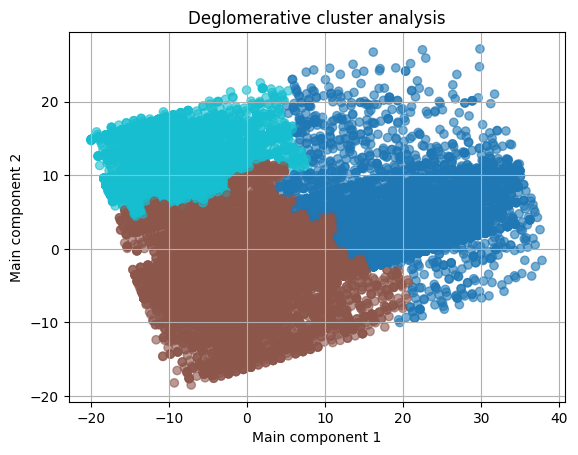

In [ ]:
#Deglomeracyjna analiza skupień po PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Wczytanie danych z PCA (components_df)
data = components_df

# Wyznaczenie liczby skupień
num_clusters = 3

# Model aglomeracyjny analizy skupień
ac_deg = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac_deg.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac_deg.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Deglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [ ]:
#5.5 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
#biblioteki
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

#import zestawu danych make_moons
from sklearn.datasets import make_moons

#Generowanie losowych danych w kształcie sierpowatym
features, label = make_moons(n_samples=2000)

#Tworzenie modelu DBSCAN
db=DBSCAN()

db.fit(features)

pred_label=db.fit_predict(features)

#Wykres skupień
plt.scatter(features[:,0], features[:,1], c=pred_label, marker="o", cmap="tab10", alpha=0.6)

#Wyznaczanie tytułu wykresu
plt.title("DBSCAN algorithm")
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

# Tworzenie modelu DBSCAN
db = DBSCAN()

# Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(components)

pred_label = db.fit_predict(components)

# Wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_label, marker="o", cmap="tab10", alpha=0.6)
plt.title("DBSCAN algorithm | PCA")
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

# Tworzenie modelu DBSCAN
db = DBSCAN()

# Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(components)

pred_label = db.fit_predict(components)

# Wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_label, marker="o", cmap="tab10", alpha=0.6)
plt.title("DBSCAN algorithm | PCA")
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)

# Zapisujemy etykiety
labels = np.unique(pred_label)

# Tworzymy osobny rysunek dla etykiet
fig, ax = plt.subplots()

# Umieszczamy etykiety na wykresie
for i, label in enumerate(labels):
    if label != -1:
        indices = pred_label == label
        x = components[indices, 0]
        y = components[indices, 1]
        ax.scatter(x, y, label=f'Label {label}')
    elif i == 0:
        indices = pred_label == label
        x = components[indices, 0]
        y = components[indices, 1]
        ax.scatter(x, y, label=f'Noise')

    # Zawijanie listy co 20 etykiet
    if i % 20 == 0 and i != 0:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        fig, ax = plt.subplots()

# Dodajemy legendę na końcu
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [ ]:
#Ocenianie jakości analizy skupień

In [ ]:
import pandas as pd

#dataset = components
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

print(components_df.head())

   główna_składowa_1  główna_składowa_2
0         -14.381964          10.278081
1          -2.008197          15.346960
2           5.088557           1.974154
3         -13.270577          10.206090
4          -0.953466          -7.865955


In [ ]:
#components = pca_model.fit_transform(data)
#components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

In [ ]:
feature_set = ['główna_składowa_1']

features = components_df[feature_set]

target = components_df['główna_składowa_2']

In [ ]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score

In [ ]:
#Dla: Metoda k-średnich (k-means)/centroidów
km.fit(feature_train)

# Przewiduje zmienną docelową
predictions_km = km.predict(feature_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_km))
print("silhouette_score:", silhouette_score(feature_test, predictions_km))

davies_bouldin_score: 0.5708024332463265
silhouette_score: 0.5386345411838815


In [ ]:
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_km))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_km))

adjusted_rand_score: 0.00017881938935584735
fowlkes_mallows_score: 0.01224047031644682


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [ ]:
#Dla: Hierarchiczna analiza skupień
#feature_set = ['główna_składowa_1', 'główna_składowa_2']

#features = components_df[feature_set]

#feature_train, feature_test = train_test_split(features, test_size=0.3, random_state=1)

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(feature_train)

# Przewidywanie zmiennej docelowej
predictions_ac = ac.fit_predict(feature_test)

In [ ]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_ac))
print("silhouette_score:", silhouette_score(feature_test, predictions_ac))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_ac))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_ac))

davies_bouldin_score: 0.4749153795511756
silhouette_score: 0.5570706782215371
adjusted_rand_score: 6.510309104045549e-05
fowlkes_mallows_score: 0.009641963744349048


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [ ]:
# Wczytanie danych z PCA (components_df)
#data = components_df

# Wyznaczenie liczby skupień
#num_clusters = 3

# Model aglomeracyjny analizy skupień
#ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac_deg.fit(feature_train)

# Przewidywanie zmiennej docelowej
predictions_ac_deg = ac_deg.fit_predict(feature_test)

In [ ]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_ac_deg))
print("silhouette_score:", silhouette_score(feature_test, predictions_ac_deg))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_ac_deg))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_ac_deg))

davies_bouldin_score: 0.4749153795511756
silhouette_score: 0.5570706782215371
adjusted_rand_score: 6.510309104045549e-05
fowlkes_mallows_score: 0.009641963744349048


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [ ]:
#Dla: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
#data = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
#pca_model = PCA(n_components=2)
#components = pca_model.fit_transform(data)
#components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

# Tworzenie modelu DBSCAN
db = DBSCAN()

# Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(feature_train)

predictions_db = db.fit_predict(feature_test)

In [ ]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_db))
print("silhouette_score:", silhouette_score(feature_test, predictions_db))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_db))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_db))

davies_bouldin_score: 0.31776966736575674
silhouette_score: 0.32354890371796413
adjusted_rand_score: 1.569525567623136e-07
fowlkes_mallows_score: 0.007777872328461811


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
